In [1]:
# Dependencies and Setup
# !pip install citipy
#!pip install gmaps
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import os
import time
from scipy.stats import linregress
import gmaps
import gmaps.datasets
# Import API key
from api_keys import weather_api_key
from api_keys import g_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

df = pd.DataFrame(cities)
df['Country'] = ''
df['Date'] = ''
df['Lat'] = ''
df['Lng'] = ''
df['Max Temp'] = ''
df['Humidity'] = ''
df['Cloudiness'] = ''
df['Wind Speed'] = ''
df.rename(columns = {0 : 'City'}, inplace = True)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
for index, row in df.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = row['City']
    response = requests.get(url + 'appid=' + weather_api_key + '&q=' + city + "&units=Imperial")
    response = response.json()
    try:
        print(f'{city} has been added to the DataFrame.')
        df.loc[index, 'Lat'] = response['coord']['lat']
        df.loc[index, 'Lng'] = response['coord']['lon']
        df.loc[index, 'Max Temp'] = response['main']['temp_max']
        df.loc[index, 'Humidity'] = response['main']['humidity']
        df.loc[index, 'Cloudiness'] = response['clouds']['all']
        df.loc[index, 'Wind Speed'] = response['wind']['speed']
        df.loc[index, 'Country'] = response['sys']['country']
        df.loc[index, 'Date'] = response['dt']
    except(KeyError, IndexError):
        print('Missing City ... Skipping')

dandong has been added to the DataFrame.
chowchilla has been added to the DataFrame.
bredasdorp has been added to the DataFrame.
albany has been added to the DataFrame.
north platte has been added to the DataFrame.
hihifo has been added to the DataFrame.
Missing City ... Skipping
busselton has been added to the DataFrame.
vaini has been added to the DataFrame.
saint-philippe has been added to the DataFrame.
dikson has been added to the DataFrame.
mataura has been added to the DataFrame.
castro has been added to the DataFrame.
taolanaro has been added to the DataFrame.
Missing City ... Skipping
skalistyy has been added to the DataFrame.
Missing City ... Skipping
jamestown has been added to the DataFrame.
butaritari has been added to the DataFrame.
verkhniye kigi has been added to the DataFrame.
mys shmidta has been added to the DataFrame.
Missing City ... Skipping
pangnirtung has been added to the DataFrame.
balykshi has been added to the DataFrame.
Missing City ... Skipping
husavik has

changli has been added to the DataFrame.
nedjo has been added to the DataFrame.
vardo has been added to the DataFrame.
new norfolk has been added to the DataFrame.
port hardy has been added to the DataFrame.
tumannyy has been added to the DataFrame.
Missing City ... Skipping
margate has been added to the DataFrame.
leningradskiy has been added to the DataFrame.
normandin has been added to the DataFrame.
qaanaaq has been added to the DataFrame.
hithadhoo has been added to the DataFrame.
garowe has been added to the DataFrame.
bethel has been added to the DataFrame.
saint george has been added to the DataFrame.
naze has been added to the DataFrame.
saint-augustin has been added to the DataFrame.
omboue has been added to the DataFrame.
grand baie has been added to the DataFrame.
bayir has been added to the DataFrame.
mindelo has been added to the DataFrame.
pisco has been added to the DataFrame.
carrick-on-suir has been added to the DataFrame.
jabiru has been added to the DataFrame.
Missi

masterton has been added to the DataFrame.
mahanje has been added to the DataFrame.
kyzyl-suu has been added to the DataFrame.
miranorte has been added to the DataFrame.
Missing City ... Skipping
akyab has been added to the DataFrame.
tornio has been added to the DataFrame.
antofagasta has been added to the DataFrame.
zhigansk has been added to the DataFrame.
lolua has been added to the DataFrame.
Missing City ... Skipping
marsh harbour has been added to the DataFrame.
cortes has been added to the DataFrame.
purranque has been added to the DataFrame.
haines junction has been added to the DataFrame.
ucluelet has been added to the DataFrame.
aquiraz has been added to the DataFrame.
severodvinsk has been added to the DataFrame.
kruisfontein has been added to the DataFrame.
talnakh has been added to the DataFrame.
yarmouth has been added to the DataFrame.
tezu has been added to the DataFrame.
muscat has been added to the DataFrame.
kiunga has been added to the DataFrame.
kendari has been a

campestre has been added to the DataFrame.
villa carlos paz has been added to the DataFrame.
jiexiu has been added to the DataFrame.
saint-georges has been added to the DataFrame.
kangalassy has been added to the DataFrame.
tawnat has been added to the DataFrame.
Missing City ... Skipping
gedo has been added to the DataFrame.
lazaro cardenas has been added to the DataFrame.
diapaga has been added to the DataFrame.
price has been added to the DataFrame.
north bend has been added to the DataFrame.
skibbereen has been added to the DataFrame.
aguimes has been added to the DataFrame.
macusani has been added to the DataFrame.
samarai has been added to the DataFrame.
boueni has been added to the DataFrame.
guerrero has been added to the DataFrame.
dwarka has been added to the DataFrame.


In [4]:
cities = df.replace('', np.nan)
cities = cities.dropna(axis = 0)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
humidity = cities.loc[cities['Humidity'] >= 100]
humidity

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
51,alice springs,AU,1.601925e+09,-23.70,133.88,50.00,100.0,90.0,9.17
152,gat,IL,1.601925e+09,31.61,34.76,78.01,100.0,0.0,7.47
161,klaksvik,FO,1.601925e+09,62.23,-6.59,50.00,100.0,95.0,8.05
175,ketchikan,US,1.601925e+09,55.34,-131.65,53.60,100.0,90.0,9.17
187,vardo,NO,1.601925e+09,70.37,31.11,42.80,100.0,90.0,9.17
230,noumea,NC,1.601925e+09,-22.28,166.46,64.40,100.0,90.0,5.82
262,paka,MY,1.601925e+09,4.64,103.44,75.20,100.0,100.0,6.20
273,kankaanpaa,FI,1.601925e+09,61.80,22.42,51.01,100.0,0.0,4.70
302,leczna,PL,1.601925e+09,51.30,22.88,64.40,100.0,3.0,11.41
377,tornio,FI,1.601925e+09,65.85,24.15,48.20,100.0,90.0,11.41


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outlier
cities = cities.loc[cities['Humidity']< 100]

In [7]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
cities.to_csv('City_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

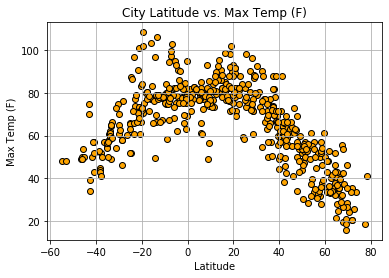

In [8]:
from scipy import stats
import scipy.stats as st

x = cities['Lat']
y = cities['Max Temp']

plt.scatter(x,y, facecolors = 'orange', edgecolor = 'black')
plt.title('City Latitude vs. Max Temp (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(b= True)
plt.savefig("Fig1.png")

#The temperature increases as you get closer to the equator

## Latitude vs. Humidity Plot

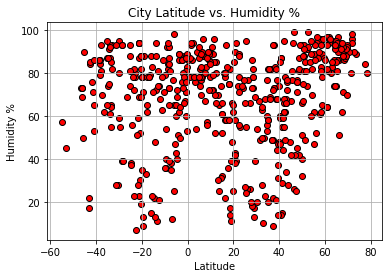

In [9]:
x = cities['Lat']
y = cities['Humidity']

plt.scatter(x,y, facecolors = 'red', edgecolor = 'black')
plt.title('City Latitude vs. Humidity %')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid(b= True)
plt.savefig("Fig2.png")
#Humidity is consistently high around the equator and becomes more distributed as you move either north or south

## Latitude vs. Cloudiness Plot

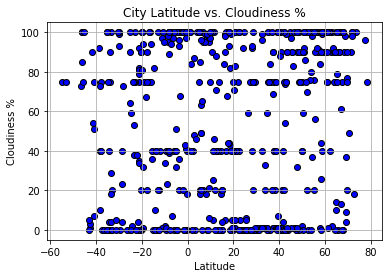

In [10]:
x = cities['Lat']
y = cities['Cloudiness']

plt.scatter(x,y, facecolors = 'blue', edgecolor = 'black')
plt.title('City Latitude vs. Cloudiness %')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid(b= True)
plt.savefig("Fig3.png")
#Majority of citys have either 100% cloudiness or very low-to-0 cloudiness

## Latitude vs. Wind Speed Plot

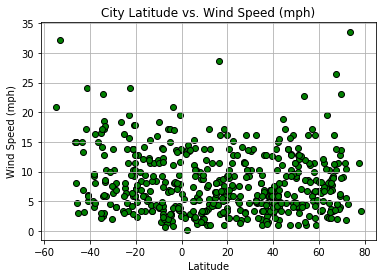

In [11]:
x = cities['Lat']
y = cities['Wind Speed']

plt.scatter(x,y, facecolors = 'green', edgecolor = 'black')
plt.title('City Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b= True)
plt.savefig("Fig4.png")
#Most observed cities do not have wind speed above 10 mph

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern = cities.loc[cities['Lat']>= 0]
southern = cities.loc[cities['Lat']< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-squared is -0.8451668468267186


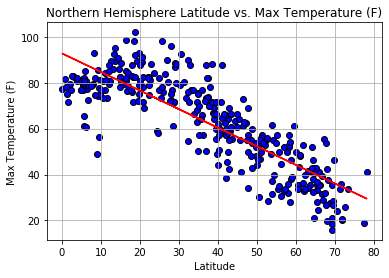

In [13]:
x = northern['Lat']
y = northern['Max Temp']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue', edgecolor = 'black')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("Fig5.png")
# The high -r value indicates a strong negative correlation between latitude and max temperature. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-squared is 0.6832083275209604


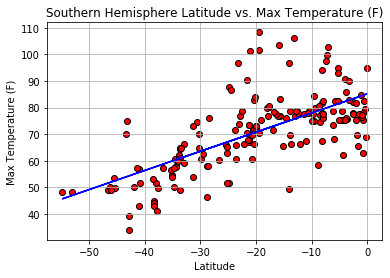

In [14]:
x = southern['Lat']
y = southern['Max Temp']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red', edgecolor = 'black')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("Fig6.png")
# The high r value indicates a strong positive correlation between latitude and max temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-squared is 0.2155225558167439


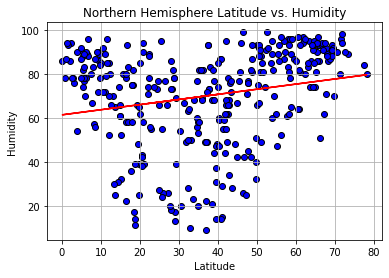

In [15]:
x = northern['Lat']
y = northern['Humidity']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue', edgecolor = 'black')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("Fig7.png")
#The low r values indicate a weak to no relationship between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-squared is -0.039385985950849765


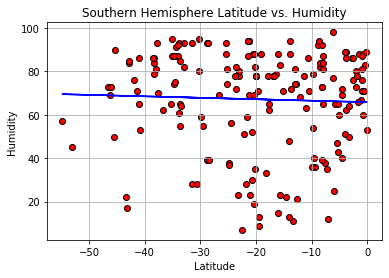

In [16]:
x = southern['Lat']
y = southern['Humidity']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red', edgecolor = 'black')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("Fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-squared is 0.1509157957546536


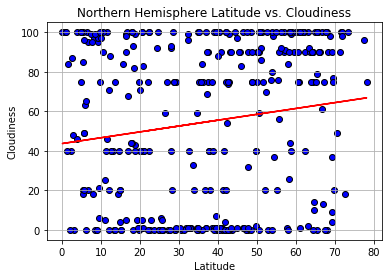

In [17]:
x = northern['Lat']
y = northern['Cloudiness']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue', edgecolor = 'black')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("Fig9.png")
#The low r values indicate a weak positive relationship between latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-squared is 0.05946692489303218


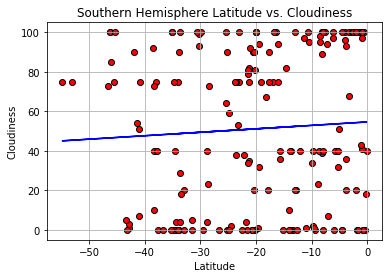

In [18]:
x = southern['Lat']
y = southern['Cloudiness']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red', edgecolor = 'black')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("Fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-squared is 0.11457740325325214


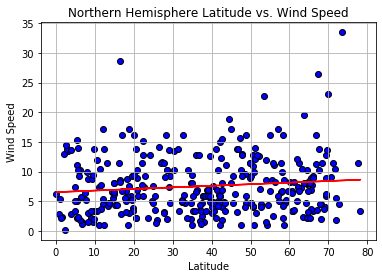

In [19]:
x = northern['Lat']
y = northern['Wind Speed']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue', edgecolor = 'black')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("Fig11.png")
#The low r values indicate that there is no real relationship between wind speed and latitude. The difference 
#between the hemispheres doesn't seem to be significant enough to comment upon.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-squared is -0.21886737034567746


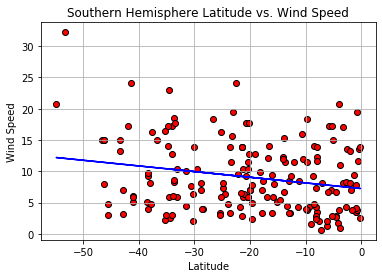

In [20]:
x = southern['Lat']
y = southern['Wind Speed']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red', edgecolor = 'black')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b= True)
plt.savefig("Fig12.png")
print(f' The r-squared is {cor[0]}')

In [22]:
data = "City_data.csv"
cities = pd.read_csv(data)
cities.rename(columns = {'Unnamed: 0' : 'Drop'}, inplace = True)
del cities['Drop']
#
cities

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,dandong,CN,1.601925e+09,40.13,124.39,44.22,74.0,0.0,3.04
1,chowchilla,US,1.601925e+09,37.12,-120.26,87.80,22.0,1.0,3.53
2,bredasdorp,ZA,1.601925e+09,-34.53,20.04,60.80,87.0,0.0,5.82
3,albany,US,1.601925e+09,42.60,-73.97,64.00,62.0,74.0,1.81
4,north platte,US,1.601925e+09,41.12,-100.77,87.80,15.0,1.0,13.87
...,...,...,...,...,...,...,...,...,...
510,macusani,PE,1.601925e+09,-14.08,-70.43,49.46,48.0,10.0,11.99
511,samarai,PG,1.601925e+09,-10.62,150.67,77.90,86.0,100.0,15.99
512,boueni,YT,1.601925e+09,-12.90,45.08,78.80,74.0,20.0,3.36
513,guerrero,MX,1.601925e+09,17.67,-100.00,76.77,36.0,44.0,5.46


In [23]:
!jupyter nbextension list
!jupyter nbextension enable --py gmaps
from ipywidgets.embed import embed_minimal_html
#
gmaps.configure(api_key = g_key)
locations = cities[['Lat', 'Lng']]
weights = cities['Humidity']
fig = gmaps.figure(map_type = 'HYBRID', center = (0,0), zoom_level = 3)
heat = gmaps.heatmap_layer(locations, weights = weights, max_intensity = 0, point_radius = 30)
fig.add_layer(heat)
#
fig

Known nbextensions:
  config dir: C:\Users\chris\.jupyter\nbconfig
    notebook section
      jupyter-gmaps/extension enabled 
  config dir: C:\Users\chris\Anaconda3\etc\jupyter\nbconfig
    notebook section
      bqplot/extension enabled 
      ipyvolume/extension enabled 
      jupyter-webrtc/extension enabled 
      jupyter-datawidgets/extension enabled 
      jupyter-leaflet/extension enabled 
      jupyter-matplotlib/extension enabled 
      jupyter-threejs/extension enabled 
      jupyter-vue/extension enabled 
      jupyter-vuetify/extension enabled 
      jupyter-js-widgets/extension enabled 


      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


Figure(layout=FigureLayout(height='420px'))

In [25]:
hotels = cities.loc[(cities["Max Temp"] <= 80) & (cities["Max Temp"] >= 70) &(cities["Cloudiness"] == 0) &(cities["Wind Speed"] < 10)]
hotels

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
106,nchelenge,ZM,1.601925e+09,-9.35,28.73,79.81,36.0,0.0,4.23
155,diban,SY,1.601925e+09,35.04,40.52,75.31,20.0,0.0,9.37
161,kasulu,TZ,1.601925e+09,-4.58,30.10,75.20,69.0,0.0,2.91
230,antri,IN,1.601925e+09,26.06,78.21,75.87,26.0,0.0,1.92
289,faya,SA,1.601925e+09,18.39,42.45,71.60,82.0,0.0,5.82
374,beroroha,MG,1.601925e+09,-21.67,45.17,70.63,59.0,0.0,6.44
412,rawatbhata,IN,1.601925e+09,24.93,75.58,76.68,27.0,0.0,4.72
425,lakheri,IN,1.601925e+09,25.67,76.17,77.95,24.0,0.0,1.39
473,mufulira,ZM,1.601925e+09,-12.55,28.24,77.90,21.0,0.0,9.17
493,khuzdar,PK,1.601925e+09,27.74,66.64,72.01,20.0,0.0,3.09


In [28]:
hotels['Hotel Name'] = ''
params = {
    "radius": 5000, 
    "types": "lodging",
    "key": g_key}

for index, row in hotels.iterrows():
    city = row['City']
    lat = row["Lat"]
    lng = row["Lng"]
    
    params["location"] = f"{lat},{lng}"
    url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    response = requests.get(url, params = params)
    response = response.json()
    try:
        print(f'Finding Lodging for {city}')
        print('----------------------------')
        hotels.loc[index, "Hotel Name"] = response["results"][0]["name"]
    except (KeyError, IndexError):
        print("No Lodging Found.")
        print('----------------------------')
        hotels.loc[index, "Hotel Name"] = "No Lodging Found"
        
hotels
        

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Finding Lodging for nchelenge
----------------------------
Finding Lodging for diban
----------------------------
No Lodging Found.
----------------------------
Finding Lodging for kasulu
----------------------------
Finding Lodging for antri
----------------------------
Finding Lodging for faya
----------------------------
Finding Lodging for beroroha
----------------------------
No Lodging Found.
----------------------------
Finding Lodging for rawatbhata
----------------------------
Finding Lodging for lakheri
----------------------------
Finding Lodging for mufulira
----------------------------
Finding Lodging for khuzdar
----------------------------


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Hotel Name
106,nchelenge,ZM,1.601925e+09,-9.35,28.73,79.81,36.0,0.0,4.23,Mweru Water Transport
155,diban,SY,1.601925e+09,35.04,40.52,75.31,20.0,0.0,9.37,No Lodging Found
161,kasulu,TZ,1.601925e+09,-4.58,30.10,75.20,69.0,0.0,2.91,Capital Lodge
230,antri,IN,1.601925e+09,26.06,78.21,75.87,26.0,0.0,1.92,Jama masjid antri
289,faya,SA,1.601925e+09,18.39,42.45,71.60,82.0,0.0,5.82,مقبرة ال مجمل
374,beroroha,MG,1.601925e+09,-21.67,45.17,70.63,59.0,0.0,6.44,No Lodging Found
412,rawatbhata,IN,1.601925e+09,24.93,75.58,76.68,27.0,0.0,4.72,Bhainsrorgarh Fort Hotel
425,lakheri,IN,1.601925e+09,25.67,76.17,77.95,24.0,0.0,1.39,सोनू किराना स्टोर
473,mufulira,ZM,1.601925e+09,-12.55,28.24,77.90,21.0,0.0,9.17,Kamiria lodge
493,khuzdar,PK,1.601925e+09,27.74,66.64,72.01,20.0,0.0,3.09,jhalwan Rent A Car Moola Chotok Boking Office


In [29]:
# Add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
hotel_info = [info_box_template.format(**row) for index, row in hotels.iterrows()]
lodging = hotels[["Lat", "Lng"]]


In [30]:
# Add marker layer ontop of heat map
# Display figure
hotel_plot = gmaps.symbol_layer(lodging, fill_color = 'red', stroke_color = 'blue', info_box_content = hotel_info)
fig.add_layer(hotel_plot)
#
fig

Figure(layout=FigureLayout(height='420px'))